## Global measures distributions in snapshots joint for treatments

## 1.5 body distances
## angle 60 degrees

Average clustering coefficient unweighted
CS_OCT Ttest_indResult(statistic=-2.062149604772484, pvalue=0.049328860865161736)


/tmp/ipykernel_489199/3445039960.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  CS_LDA = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_LDA_5DIZ[measure_name], equal_var=False)
/tmp/ipykernel_489199/3445039960.py:39: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  CS_OCT = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_OCT_5DIZ[measure_name], equal_var=False)


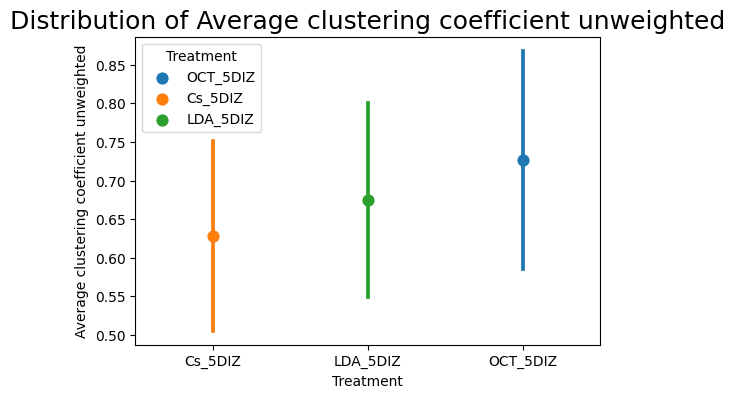

Average betweenness centrality unweighted
CS_OCT Ttest_indResult(statistic=2.125336539067781, pvalue=0.04284807089367255)


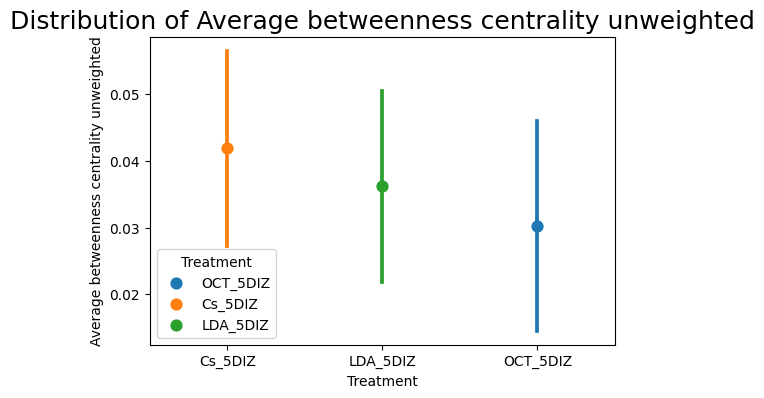

Average closseness centrality weight=count
CS_OCT Ttest_indResult(statistic=2.189526919292813, pvalue=0.044331653550374786)


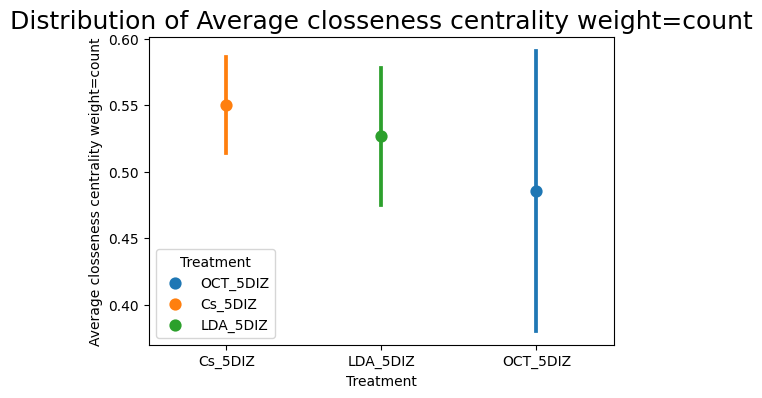

Average closseness centrality weight=duration
CS_OCT Ttest_indResult(statistic=2.124274566907254, pvalue=0.04966856095877155)


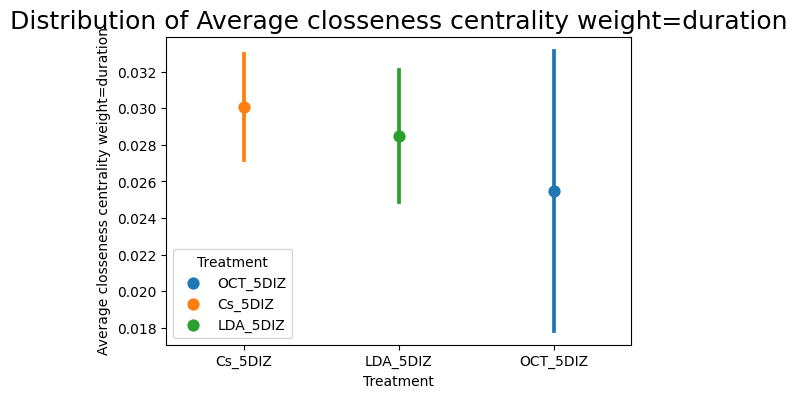

<Figure size 640x480 with 0 Axes>

In [1]:
import os
import toml
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)  

INPUT_PATH = os.path.join(settings.RESULTS_DIR, "global_measures")
all_treatments = fileio.load_files_from_folder(INPUT_PATH)

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    treatment_name = treatment_name.replace(".csv", "")
    if treatment_name in config["TREATMENTS"]:
        df = pd.read_csv(treatment_path, index_col=0)
        df['Treatment'] = treatment_name
        dataframes.append(df)

combined_data = pd.concat(dataframes)
combined_data_reset = combined_data.reset_index()
measure_names = combined_data.columns.tolist()

for i, measure_name in enumerate(measure_names):
    if measure_name == "Treatment":
        continue

    sum_Cs_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='Cs_5DIZ']
    sum_LDA_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='LDA_5DIZ']
    sum_OCT_5DIZ = combined_data_reset[combined_data_reset['Treatment']=='OCT_5DIZ']

    CS_LDA = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_LDA_5DIZ[measure_name], equal_var=False)
    CS_OCT = scipy.stats.ttest_ind(sum_Cs_5DIZ[measure_name], sum_OCT_5DIZ[measure_name], equal_var=False)
    # LDA_OCT = scipy.stats.ttest_ind(sum_OCT_5DIZ[measure_name], sum_LDA_5DIZ[measure_name], equal_var=False)
    order = ["Cs_5DIZ", "LDA_5DIZ", "OCT_5DIZ"] 
    if CS_LDA.pvalue < 0.05 or CS_OCT.pvalue < 0.05:
        print(measure_name)
        if CS_LDA.pvalue < 0.05:
            print(f'CS_LDA {CS_LDA}')

        if CS_OCT.pvalue < 0.05:
            print(f'CS_OCT {CS_OCT}')

        plt.figure(figsize=(6, 4))
        sns.pointplot(data=combined_data_reset, x="Treatment", y=measure_name, hue='Treatment', errorbar='sd', order=order)
        plt.xlabel("Treatment")  # Use plt.xlabel, not plt.set_xlabel
        plt.ylabel(measure_name)   # Use plt.ylabel, not plt.set_ylabel
        plt.title(f'Distribution of {measure_name}', fontsize=18)
        plt.show()  # Display the plot  

plt.tight_layout()
plt.show()